##**Name - Indranil Bain**
##**Roll No. - 2020CSB039**
###**Assignment - 03 (Forest Cover)**

**4. Download the Forest Cover Type dataset(https://www.kaggle.com/uciml/forest- cover-type-dataset) and preprocess the dummy variables to create training, test, and development set. Reduce the train data size if the system unable to process the whole dataset.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
BASE_PATH = '/content/drive/MyDrive/CSV Files - COLAB/covtype.csv'

In [3]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
cov_df = pd.read_csv(BASE_PATH)
cov_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
cov_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [6]:
cov_df.isnull().sum()


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [7]:
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [9]:
scaled_cols = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
for col in scaled_cols:
  scaler = StandardScaler()
  cov_df[[col]] = pd.DataFrame(
    data=scaler.fit_transform(cov_df[[col]]),
    index=cov_df.index,
    columns=[col]
)

In [11]:
def plot_count(y):
   before_dist = Counter(y)
   print("Before undersampling: ", before_dist)
   plt.xlabel("Count")
   plt.ylabel("Cover Type")
   plt.title("Count of each cover type")
   plt.bar(before_dist.keys(), before_dist.values())

Before undersampling:  Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


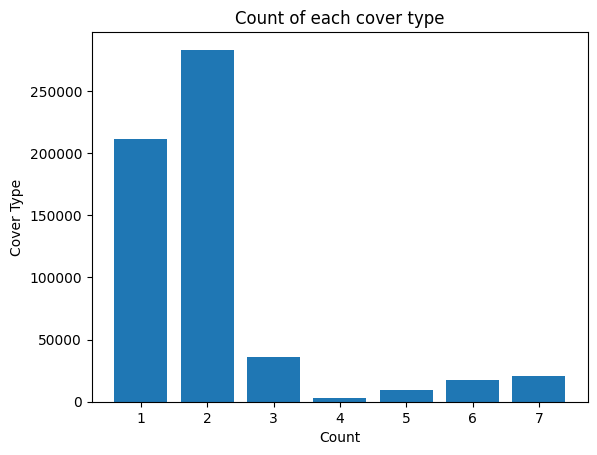

In [12]:
X = cov_df.drop('Cover_Type', axis = 1)
y = cov_df['Cover_Type']
plot_count(y)

Before undersampling:  Counter({1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747})


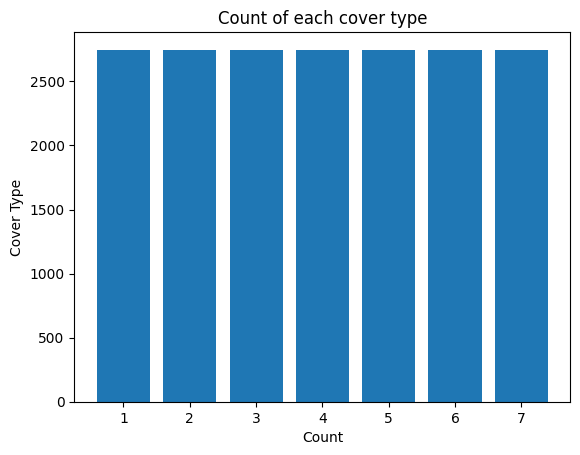

In [13]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')
X, y = undersample.fit_resample(X, y)
plot_count(y)

In [14]:
X_train, _X, y_train, _y = train_test_split(X, y, train_size=0.8)
X_test, X_val, y_test, y_val = train_test_split(_X, _y, train_size = 0.5)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(15383, 54)
(1923, 54)
(1923, 54)


**5. Apply multiclass classification in SVM using Forest Cover Type dataset**

In [15]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
accuracy = clf.score(X_test, y_test)
print(f"Accuracy = {accuracy}\n")
print(f"F1 Score = {f1}\n")

Accuracy = 0.7384295371814873

F1 Score = 0.7338095062526361



**6. Plot and Analyze the Confusion matrix for the above applied SVM method.**

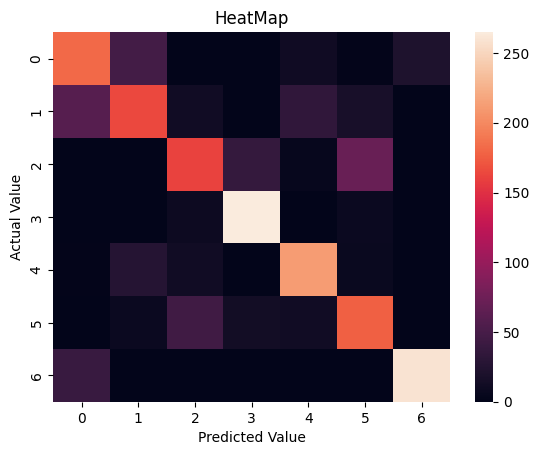

In [16]:
sns.heatmap(cm)
plt.title('HeatMap')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [18]:
sub_X_train = X.iloc[:, 0:2]
sub_y_train = y
sub_train = sub_X_train.join(sub_y_train)
sub_train = sub_train[sub_train['Cover_Type'].isin([1,2,3])]
sub_X = sub_train.drop('Cover_Type', axis = 1)
sub_y = sub_train['Cover_Type']

Before undersampling:  Counter({1: 2747, 2: 2747, 3: 2747})


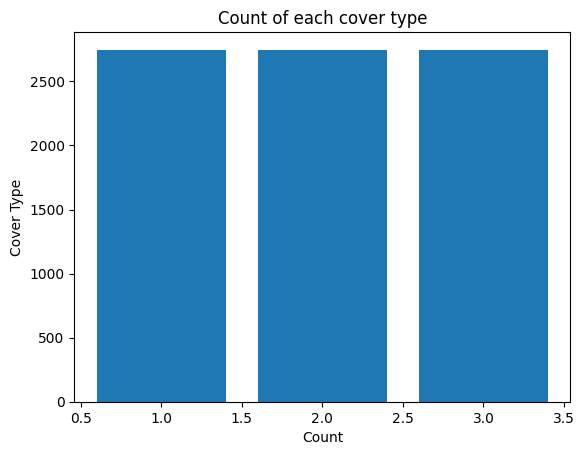

In [19]:
plot_count(sub_y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, sub_y, train_size=0.8)

In [22]:
regr = LogisticRegression(multi_class='multinomial')
model = regr.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f"Accuracy (Test) = {model.score(X_test, y_test)}")
print(f"Accuracy (Train) = {model.score(X_train, y_train)}")
print(f"F1 Score (Test)= {f1_score(y_test, y_pred_test, average='macro')}")
print(f"F1 Score (Train)= {f1_score(y_train, y_pred_train, average='macro')}")

Accuracy (Test) = 0.774408732565191
Accuracy (Train) = 0.7726031553398058
F1 Score (Test)= 0.7754359059896965
F1 Score (Train)= 0.7707171258672444


In [23]:
df_train = X_train
df_train['CoverType'] = y_train
df_train

,Elevation,Aspect,CoverType
4698,-0.337038,-1.131737,2
2180,0.752308,-0.256062,1
2632,-0.583480,-1.167479,1
4946,-0.312036,0.003067,2
4881,-0.083452,1.781224,2
...,...,...,...
2201,0.223708,-1.274705,1
1396,0.370144,-0.631351,1
4277,0.573727,0.878742,2
5111,0.066556,-0.533061,2


In [24]:
df_test = X_test
df_test['CoverType'] = y_test
df_test

,Elevation,Aspect,CoverType
8011,-1.115652,0.012002,3
6731,-1.883552,-0.524126,3
5605,-1.487101,0.619613,3
6938,-2.047847,-0.443707,3
4025,0.155847,-1.149608,2
...,...,...,...
4047,-1.137082,0.092421,2
5805,-1.851407,1.772288,3
946,1.195190,1.245096,1
7490,-1.737115,-0.988770,3


In [25]:
df_pred_test = X_test
df_pred_test['CoverType'] = y_pred_test
df_pred_test

,Elevation,Aspect,CoverType
8011,-1.115652,0.012002,3
6731,-1.883552,-0.524126,3
5605,-1.487101,0.619613,3
6938,-2.047847,-0.443707,3
4025,0.155847,-1.149608,2
...,...,...,...
4047,-1.137082,0.092421,3
5805,-1.851407,1.772288,3
946,1.195190,1.245096,1
7490,-1.737115,-0.988770,3


In [26]:
df_pred_train = X_train
df_pred_train['CoverType'] = y_pred_train
df_pred_train

,Elevation,Aspect,CoverType
4698,-0.337038,-1.131737,2
2180,0.752308,-0.256062,1
2632,-0.583480,-1.167479,2
4946,-0.312036,0.003067,2
4881,-0.083452,1.781224,2
...,...,...,...
2201,0.223708,-1.274705,1
1396,0.370144,-0.631351,1
4277,0.573727,0.878742,1
5111,0.066556,-0.533061,2


In [27]:
df_trains = [df_train[df_train['CoverType'] == i] for i in [1, 2, 3]]
df_tests = [df_test[df_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_tests = [df_pred_test[df_pred_test['CoverType'] == i] for i in [1, 2,3]]
df_pred_trains = [df_pred_train[df_pred_train['CoverType'] == i] for i in [1,2, 3]]

**7. Consider only two features and three classes and train Logistic Regression 3- class Classifier (Any three-class) to show the training and test area in a 2- Dplane, using matplotlib.**

In [30]:
def plot_scatter(title, dfs):
   plt.xlabel("Aspect")
   plt.ylabel("Elevation")
   plt.title(title)
   for _df in dfs:
    plt.scatter(_df['Aspect'], _df['Elevation'])

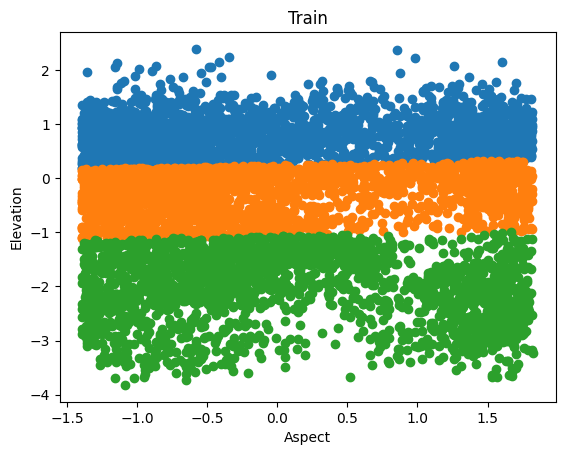

In [31]:
plot_scatter("Train", df_trains)

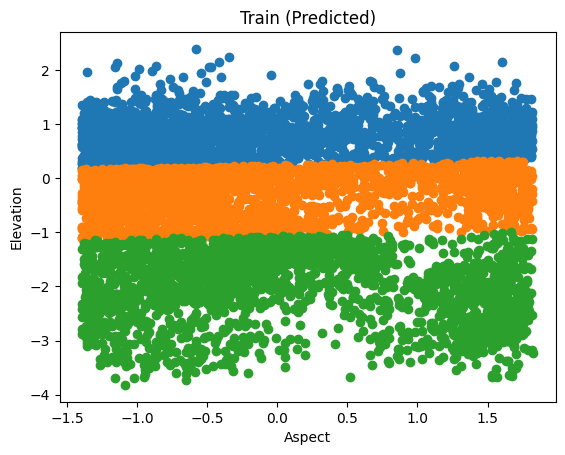

In [32]:
plot_scatter("Train (Predicted)", df_pred_trains)

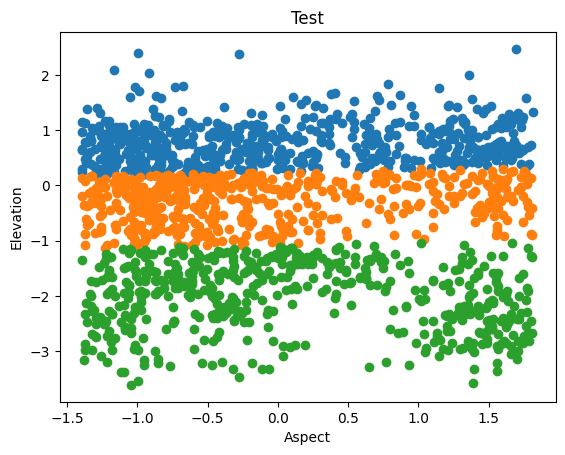

In [33]:
plot_scatter("Test", df_tests)

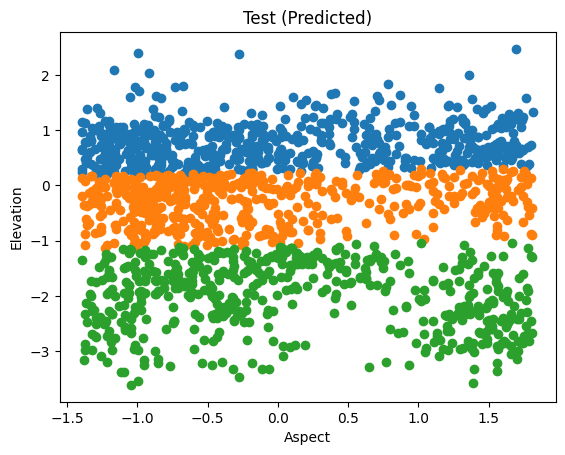

In [34]:
plot_scatter("Test (Predicted)", df_pred_tests)